In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Employee_Salary.csv")

In [4]:
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
data.isna().value_counts()

Years of Experience  Salary
False                False     2000
dtype: int64

In [6]:
data.dtypes

Years of Experience    float64
Salary                 float64
dtype: object

In [7]:
data.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

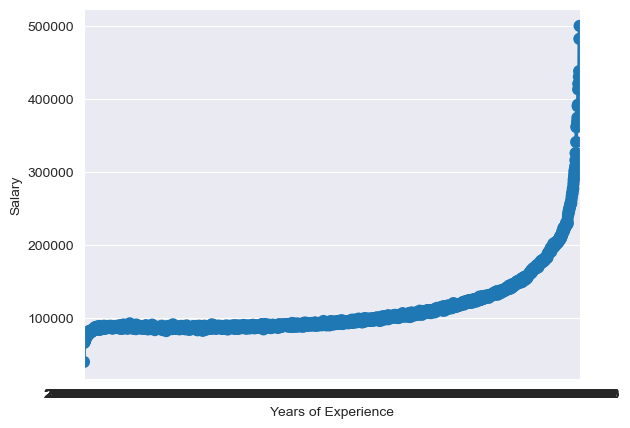

In [8]:
sns.pointplot(x="Years of Experience", y="Salary", data=data)

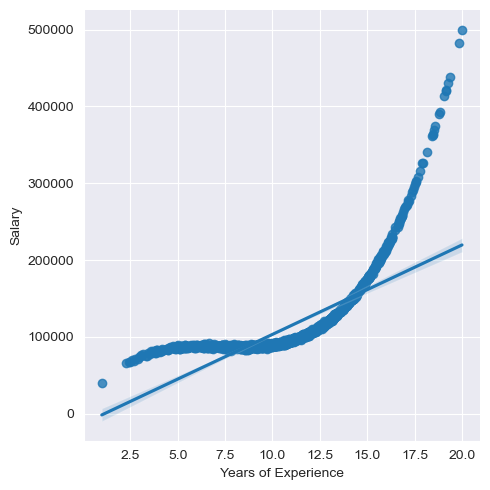

In [9]:
sns.lmplot(x="Years of Experience", y="Salary", data=data)

In [10]:
X = data[["Years of Experience"]]
y = data["Salary"]

In [11]:
X_train = X
y_train = y

In [12]:
# Definissions de l'algorithme polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regression = PolynomialFeatures(degree=3)
X_columns = poly_regression.fit_transform(X_train)

In [13]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03]])

In [14]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [15]:
print("Model coefficient: ",regressor.coef_)

Model coefficient:  [    0.         32261.24327461 -4503.00578987   205.20736238]


In [16]:
y_predict = regressor.predict(X_columns)

In [17]:
y_predict

array([ 40016.55225573,  64301.7190517 ,  67093.82572189, ...,
       437322.50153082, 482432.96441788, 497734.55596452])

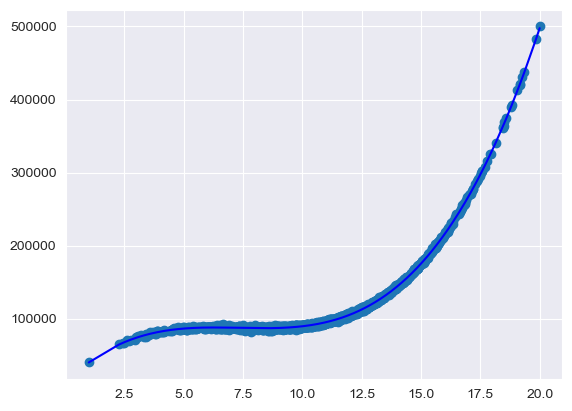

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predict, color="blue")

In [19]:
datass = pd.read_csv("50_Startups.csv")
datass.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
ndata = datass.drop(labels= list(range(8,50)), axis=0)
ndata

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [21]:
X = ndata.drop(["Profit"],axis = 1)
y = ndata[["Profit"]]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [23]:
pd.get_dummies(X_train)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
6,134615.46,147198.87,127716.82,1,0,0
4,142107.34,91391.77,366168.42,0,1,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1


In [24]:
pd.get_dummies(X_test)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
5,131876.90,99814.71,362861.36,0,1
7,130298.13,145530.06,323876.68,1,0


In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[["State"]])

OneHotEncoder(sparse=False)

In [26]:
ohe.transform(X_train[["State"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
oha = OneHotEncoder(sparse=False)
oha.fit(X_test[["State"]])

OneHotEncoder(sparse=False)

In [28]:
oha.transform(X_test[["State"]])

array([[0., 1.],
       [1., 0.]])

In [29]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
new = pd.DataFrame(one.fit_transform(datass[["State"]]).toarray())
new

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [30]:
# Apres avoir encodé faites un pd.concat pour effectuer une concatenation des éléments
datass = pd.concat([oha, new], axis=1)

TypeError: cannot concatenate object of type '<class 'sklearn.preprocessing._encoders.OneHotEncoder'>'; only Series and DataFrame objs are valid